In [9]:
import numpy as np
import matplotlib.pyplot as plt
import subtractr
import subtractr.utils as util


## Spatial cell estimation
1. Load results after running photocurrent subtraction + demixing + caviar
2. use the average photocurrent estimates to estimate the patched cell location 

In [16]:
example_path = '/Users/bantin/Documents/Columbia/Projects/2p-opto/mbcs_grids/figures/full_pipeline/220308_B6_Chrome2fGC8_030822_Cell1/220308_B6_Chrome2fGC8_030822_Cell1_OpsPositive_A_planes_subtractr_caviar_results.npz'
results = np.load(example_path, allow_pickle=True)

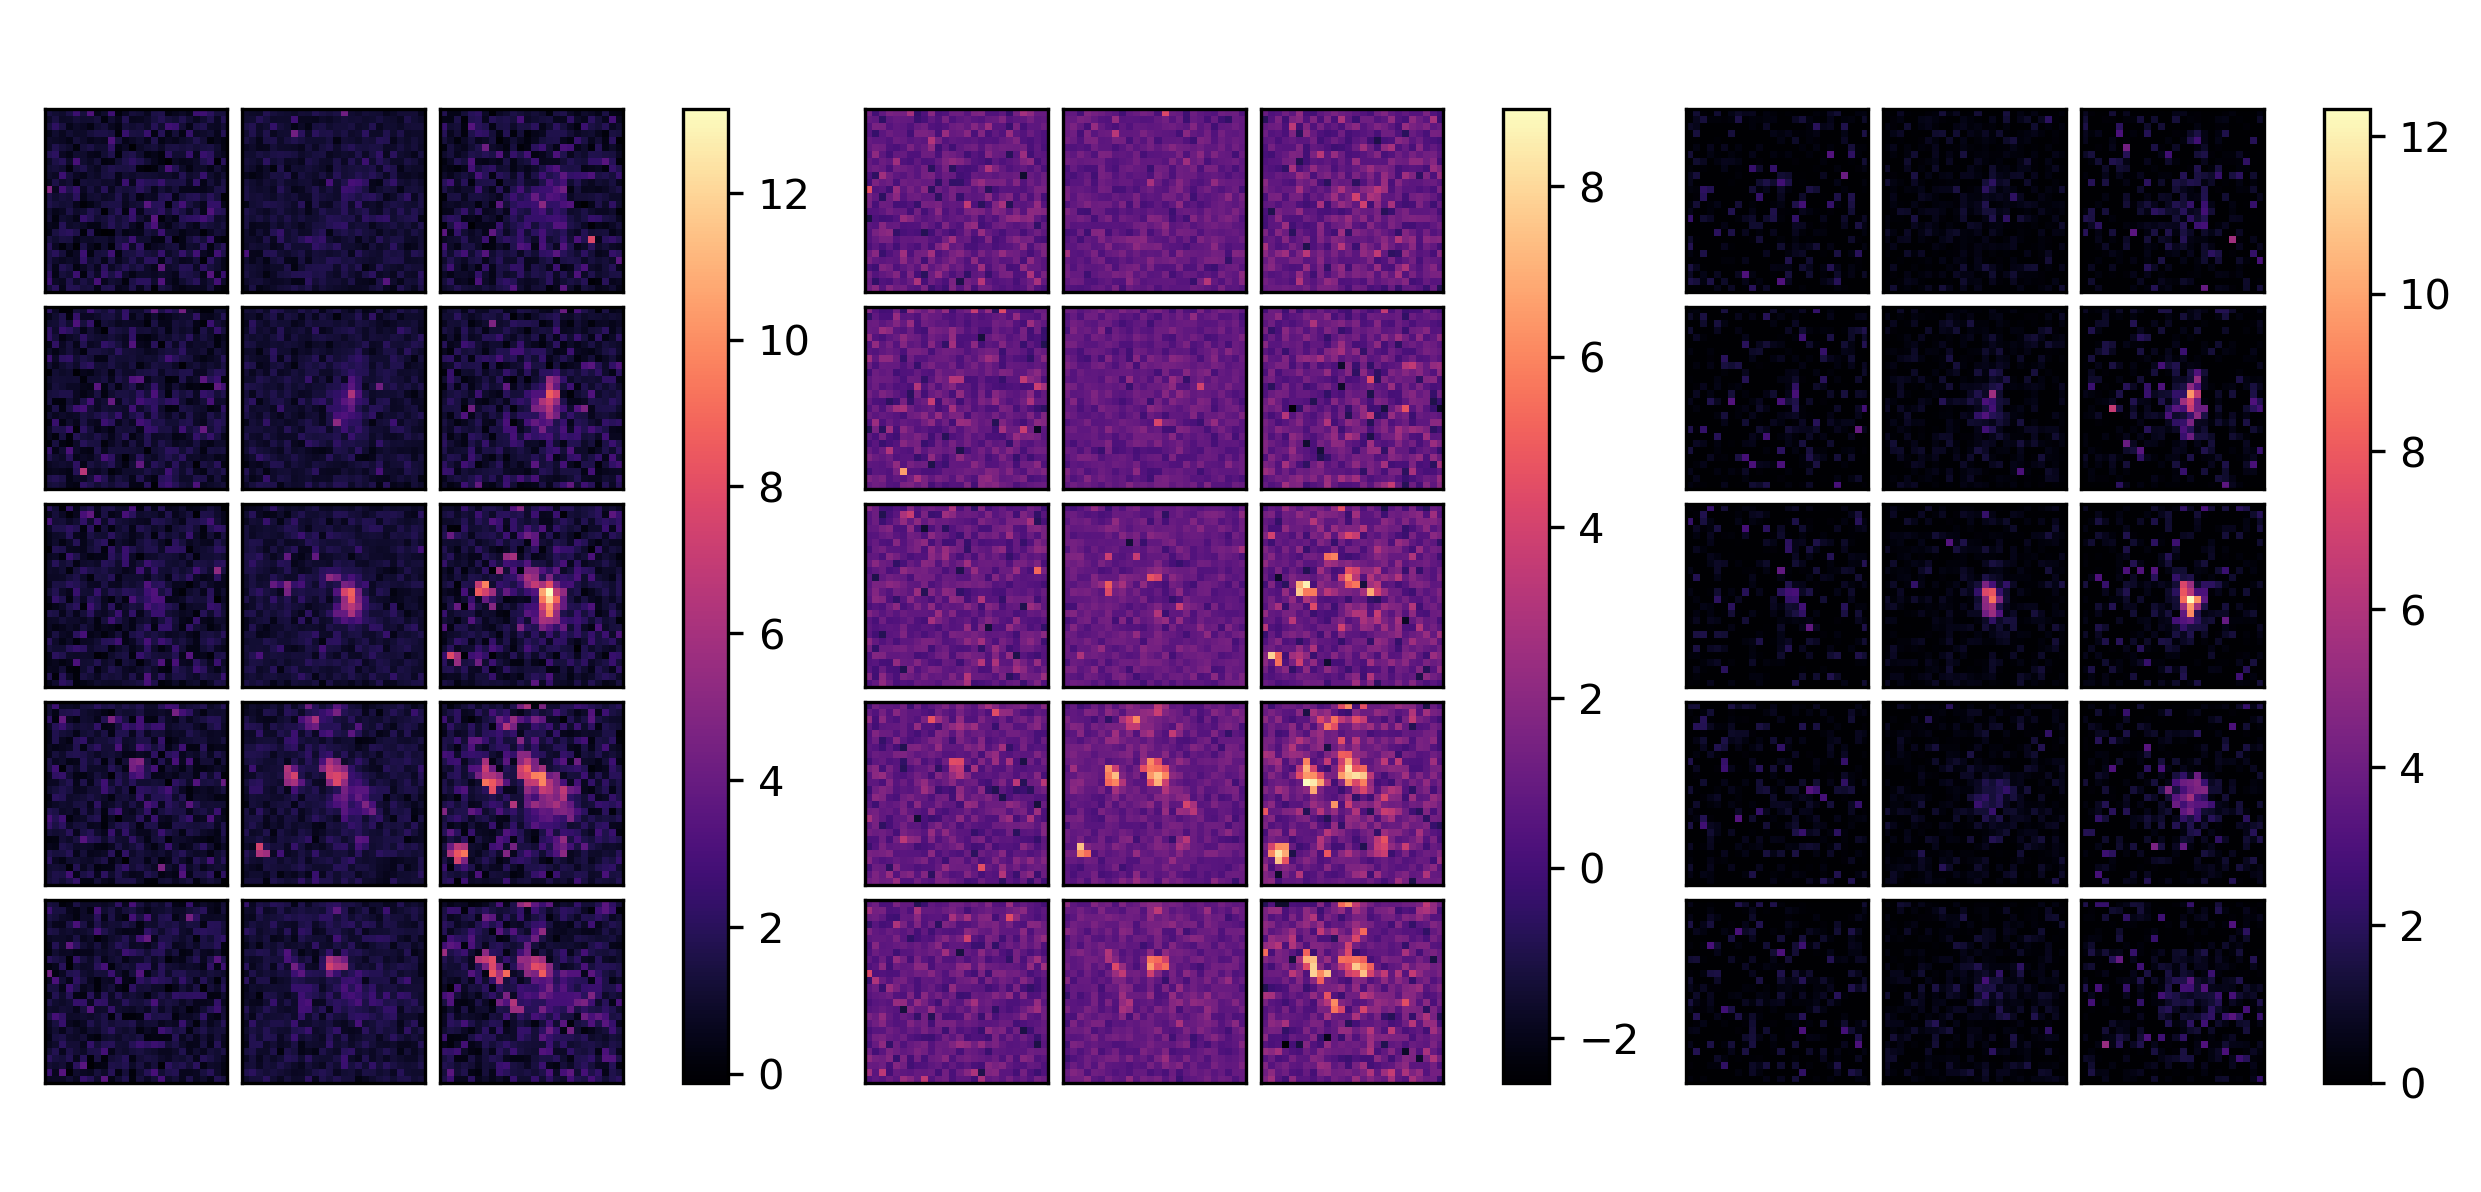

In [24]:
fig = plt.figure(figsize=(10,5), dpi=300)
est_map = util.traces_tensor_to_map(results['est_tensor'])
util.plot_multi_means(
    fig,
    [results['raw_map'], results['subtracted_map'], est_map],
    np.arange(5),
    cmaps=['magma', 'magma', 'magma'],
)


In [27]:
from scipy import ndimage

ndimage.center_of_mass(est_map[-1,...])

(12.146059074497726, 13.255877734166948, 2.0495243256113014)

In [29]:
[x for x in results.keys()]

['raw_matrix',
 'est_matrix',
 'subtracted_matrix',
 'demixed_matrix',
 'raw_tensor',
 'est_tensor',
 'subtracted_tensor',
 'demixed_tensor',
 'raw_map',
 'subtracted_map',
 'demixed_map',
 'model_state',
 'I',
 'L',
 'stim_mat',
 'loc_map',
 'args']

In [36]:
xs = np.unique(results['L'][:,0,0])
xmap = util.sequential_map(xs) # maps from x coordinate in um to unique index


In [37]:
results['L'].shape

(30420, 1, 3)

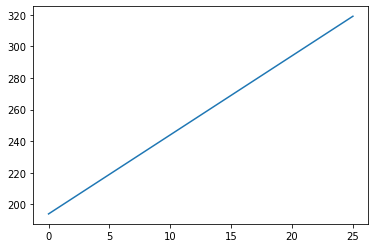

In [40]:
plt.plot([x for x in xmap.values()], [x for x in xmap.keys()])